
# Project: Investigate a Dataset (The movies Database )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<ul>
In this project, we will analyze the movie database "TMDB" from IMDB, we gonna follow the data analysis process by first understand the data, wrangling, ask questions, answering the question by visualizations the data, and statics. 
this data talk about the movies with all the details e.g.(cast, directors, revenue ... ) we will find more facts and more than more with analysis, so let's go and discover   
<ul>
**the project will answer these Questions:**
<ul>
<li><a href="#Q1">The most 10 popular movies? </a></li> 
<li><a href="#Q2">the most movies get the highst profit in each year ?</a></li> 
<li><a href="#Q3">did movies with highest profit has better rating?</a></li>
<li><a href="#Q4">which director has the highest profit?</a></li>

<ul>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


we found that here in describing in RunTime that the minimum is zero, and that not acceptable because there is no movie with zero time so we will consider that a null value and remove it. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<ul>
### Data Cleaning 
<ul>

In [6]:
#drop unused columns 
drop_col = ['id','imdb_id','cast','homepage','genres','tagline','keywords','overview','production_companies','release_date','revenue_adj','budget_adj']
df.drop(drop_col,axis=1,inplace= True)

In [7]:
#Removing the duplicacy in the rows(if any).
df.drop_duplicates(inplace=True)

In [8]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

In [9]:
# drop the null values 'Zero Runtime'  
df.dropna(inplace=True)

In [10]:
#replacing 0 with NaN of revenue column in the dataset
df['revenue'] =df['revenue'].replace(0, np.NAN)

In [11]:
#replacing 0 with NaN of budget column in the dataset
df['budget'] =df['budget'].replace(0, np.NAN)

In [12]:
#fill tha null values "revenue and budget" 
df.fillna(df.mean(),inplace= True);

In [13]:
#Changing format from float to int
change_col=['budget', 'revenue','runtime']
df[change_col]=df[change_col].applymap(np.int64)
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [14]:
#check it out 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10792 non-null float64
budget            10792 non-null int64
revenue           10792 non-null int64
original_title    10792 non-null object
director          10792 non-null object
runtime           10792 non-null int64
vote_count        10792 non-null int64
vote_average      10792 non-null float64
release_year      10792 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 843.1+ KB


In [15]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947,7.3,2015


In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10792.000000,1.079200e+04,1.079200e+04,10792.000000,10792.000000,10792.000000,10792.000000
mean,0.649765,3.077664e+07,8.925500e+07,102.404744,218.742680,5.972934,2001.270107
std,1.002611,2.691431e+07,1.086350e+08,30.456226,577.355113,0.933585,12.825792
min,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.209737,1.900000e+07,4.046691e+07,90.000000,17.000000,5.400000,1995.000000
50%,0.385598,3.077664e+07,8.925500e+07,99.000000,39.000000,6.000000,2006.000000
75%,0.717722,3.077664e+07,8.925500e+07,112.000000,147.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


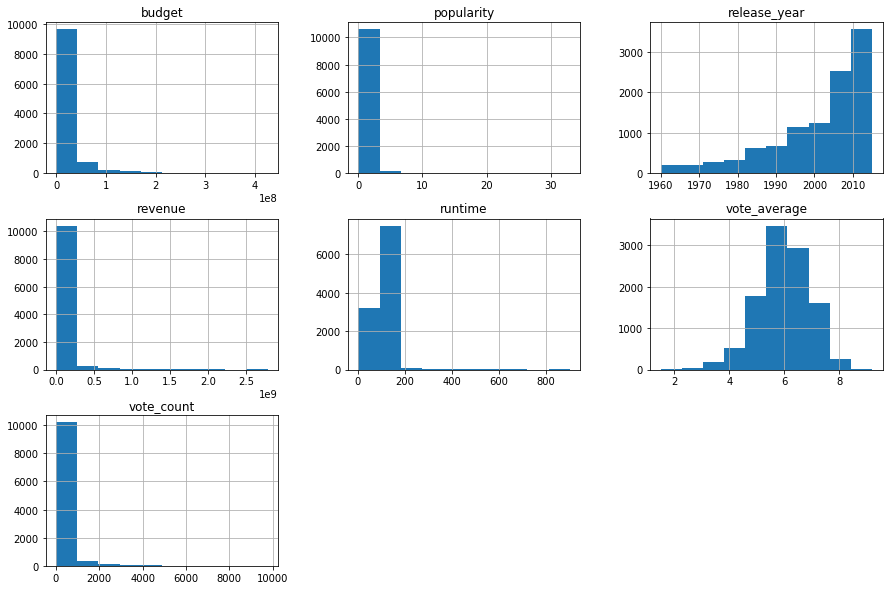

In [20]:
df.hist(figsize=(15,10));

<a id='Q1'></a>
### Research Question 1: The most 10 popular movies ? 

In [18]:
# coping the data to save the main for the reast of the project 
Q1 = df.copy()
drop_col2 = ['budget','runtime']
Q1.drop(drop_col2,axis=1,inplace= True)

In [19]:

Q1.set_index(['original_title','vote_average'],inplace=True)
top = Q1.nlargest(20,'popularity')
top.head(20)

,,popularity,revenue,director,vote_count,release_year
original_title,vote_average,,,,,
Jurassic World,6.5,32.985763,1513528810,Colin Trevorrow,5562,2015
Mad Max: Fury Road,7.1,28.419936,378436354,George Miller,6185,2015
Interstellar,8.0,24.949134,621752480,Christopher Nolan,6498,2014
Guardians of the Galaxy,7.9,14.311205,773312399,James Gunn,5612,2014
Insurgent,6.3,13.112507,295238201,Robert Schwentke,2480,2015
Captain America: The Winter Soldier,7.6,12.971027,714766572,Joe Russo|Anthony Russo,3848,2014
Star Wars,7.9,12.037933,775398007,George Lucas,4428,1977
John Wick,7.0,11.422751,78739897,Chad Stahelski|David Leitch,2712,2014
Star Wars: The Force Awakens,7.5,11.173104,2068178225,J.J. Abrams,5292,2015


<ul>
we found that many of the movies are very popular and doesn't have a better rate as we have here in 'Jurassic World' and 'The Hunger Games: Mockingjay - Part 1', with considering the vote count they are not equal and some of them have less vote count, so we can say that the popularity with rate and profit is Assistant factors to find the best for you, like if the movie has the best popularity and bad rate that's maybe the movie Known for bad reputation.
<ul>

<a id='Q2'></a>
<ul>
### Research Question 2: the most movies get the highst profit in each year ? 
<ul>

In [20]:
# coping the data to save the main for the reast of the project  
Q2 = df.copy()
#insert the profit column to the copy DataFrame 
Q2.insert(2, 'profit', Q2['revenue'] - Q2['budget'])
#set Index of movie name with its release year
Q2.set_index(['original_title'],inplace=True)
#The movie with the highest profits for each year 
#the highest profits for each year = HPEY 
HPEY = Q2.groupby('release_year')['profit'].nlargest(1)
HPEY.sort_index(ascending=False)


release_year  original_title                               
2015          Star Wars: The Force Awakens                     1868178225
2014          The Hobbit: The Battle of the Five Armies         705119788
2013          Frozen                                           1124219009
2012          The Avengers                                     1299557910
2011          Harry Potter and the Deathly Hallows: Part 2     1202817822
2010          Toy Story 3                                       863171911
2009          Avatar                                           2544505847
2008          The Dark Knight                                   816921825
2007          Harry Potter and the Order of the Phoenix         788212738
2006          Pirates of the Caribbean: Dead Man's Chest        865659812
2005          Harry Potter and the Goblet of Fire               745921036
2004          Shrek 2                                           769838758
2003          The Lord of the Rings: The Return of t

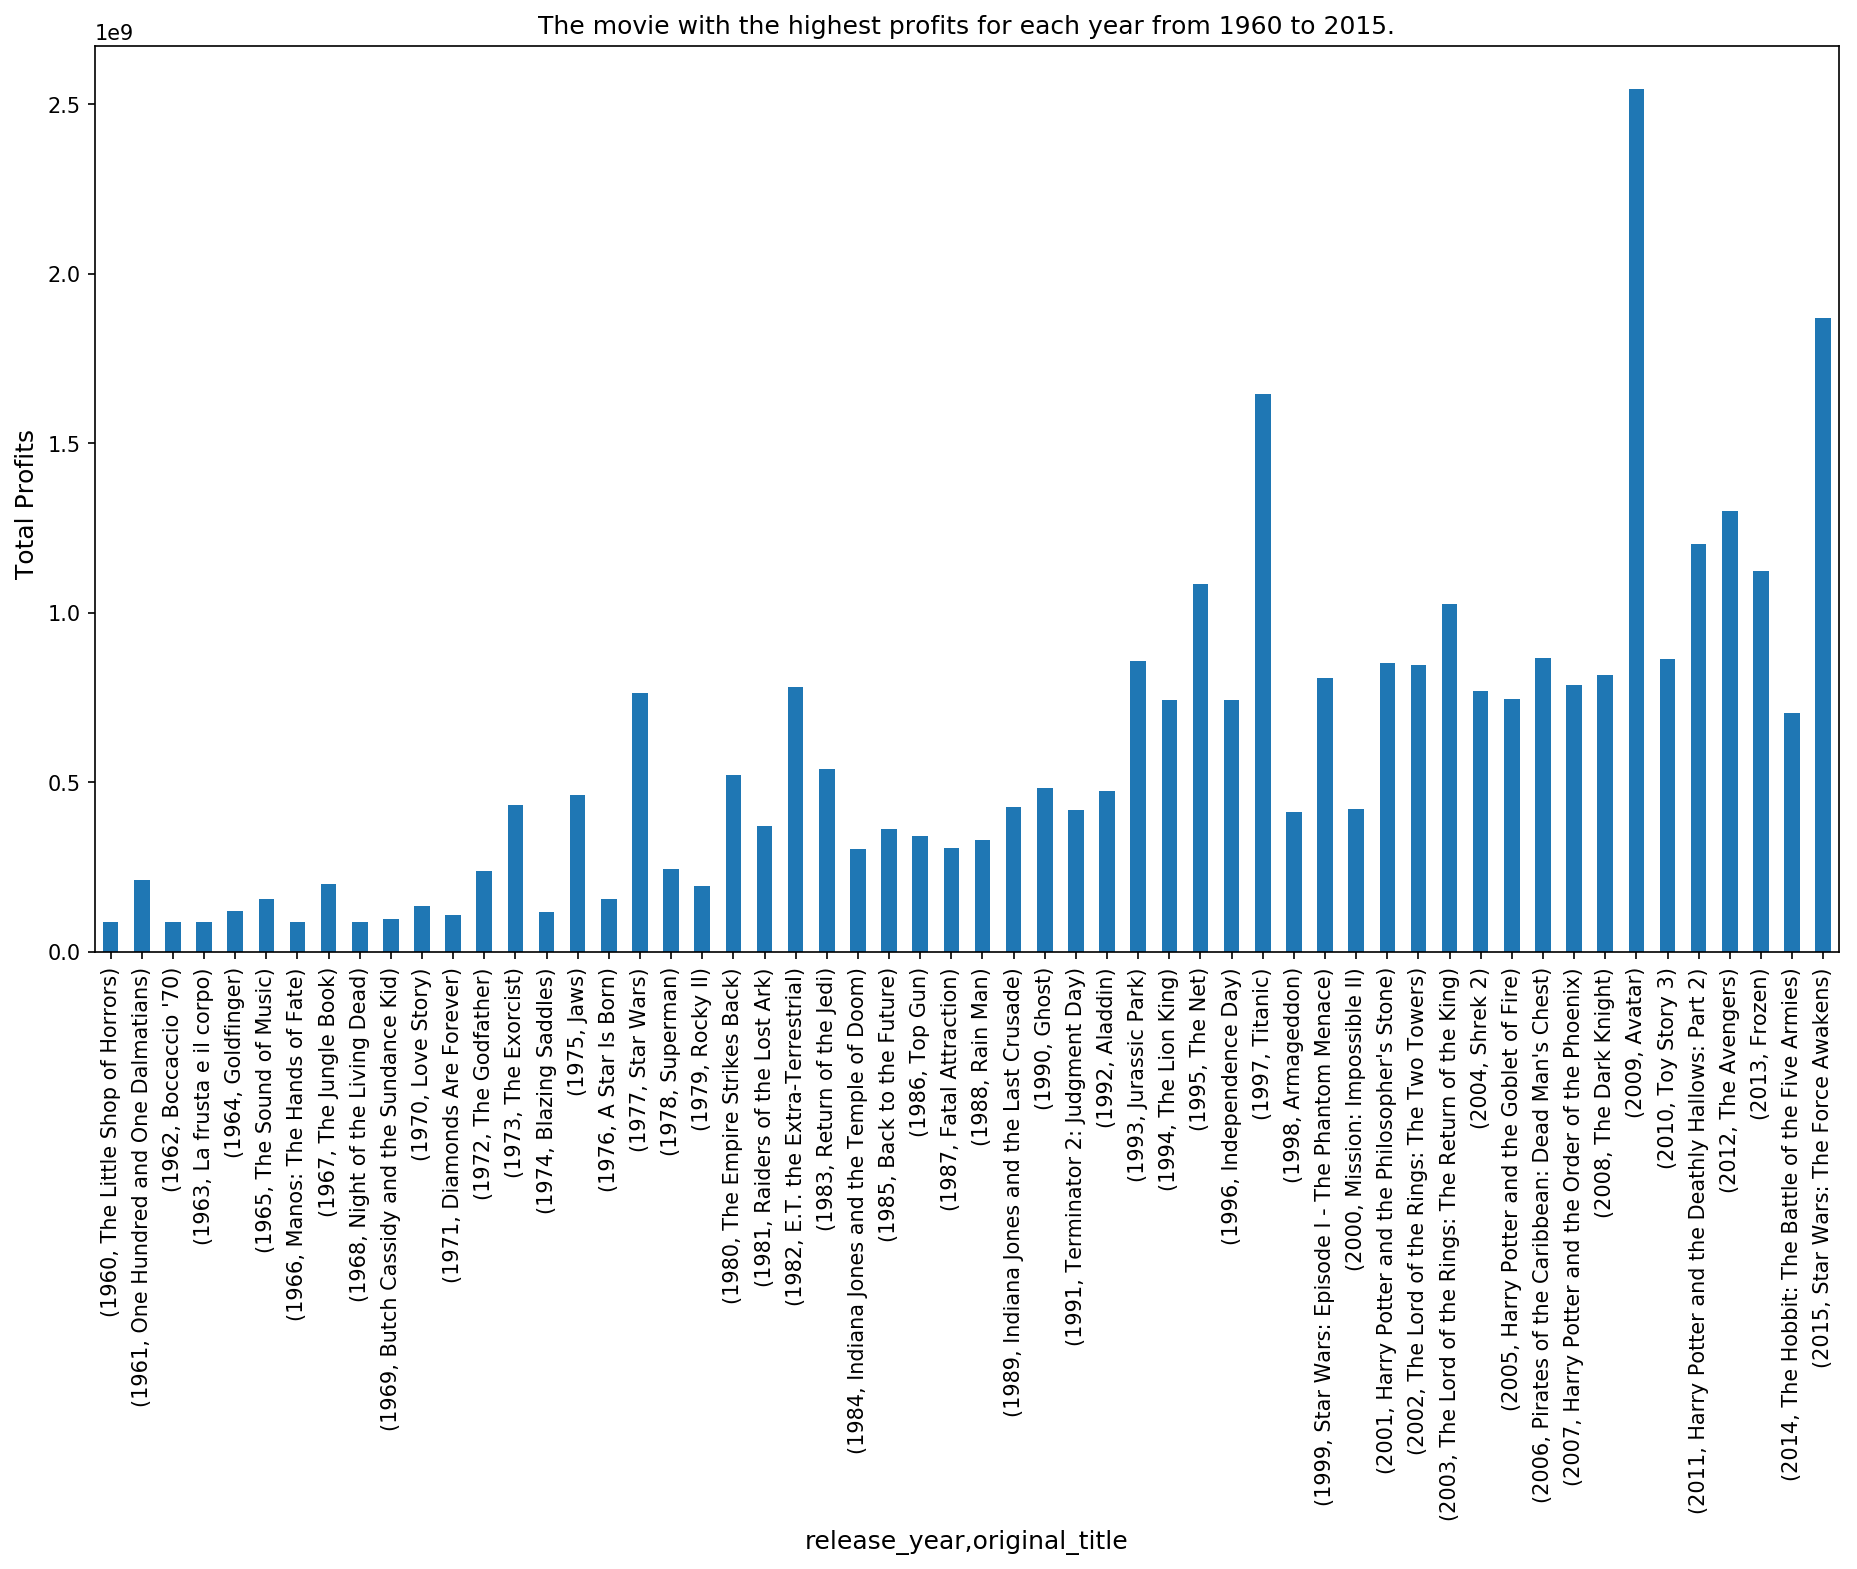

In [21]:
plt.figure(figsize=(15,8), dpi = 150)
plt.xlabel('name and year', fontsize = 12)
# set the Y, x labels  
plt.ylabel('Total Profits ', fontsize = 12)
plt.xlabel('The movie with its release year', fontsize = 12)
#set the titel of te figure 
plt.title('The movie with the highest profits for each year from 1960 to 2015.')
HPEY.plot(kind = 'bar');

the avatar in 2009 is the best ever since 1960 until 2015 With that big difference maybe until now. 

<a id='Q3'></a>
<ul>
### Research Question 3: did movies with highest profit has better rating? 
<ul>

In [22]:
Q3 = df.copy()
#insert the profit column to the copy DataFrame 
Q3.insert(2, 'profit', Q3['revenue'] - Q3['budget'])
#set Index of movie name with its release year
Q3.set_index(['original_title','vote_average'],inplace=True)
#The movies with highest profit with rate 
# the highest profit = HP
HP = Q3['profit'].nlargest(25)


In [23]:
HP.head

<bound method NDFrame.head of original_title                                 vote_average
Avatar                                         7.1             2544505847
Star Wars: The Force Awakens                   7.5             1868178225
Titanic                                        7.3             1645034188
Jurassic World                                 6.5             1363528810
Furious 7                                      7.3             1316249360
The Avengers                                   7.3             1299557910
Harry Potter and the Deathly Hallows: Part 2   7.7             1202817822
Avengers: Age of Ultron                        7.4             1125035767
Frozen                                         7.5             1124219009
The Net                                        5.6             1084279658
Minions                                        6.5             1082730962
The Lord of the Rings: The Return of the King  7.9             1024888979
Iron Man 3            

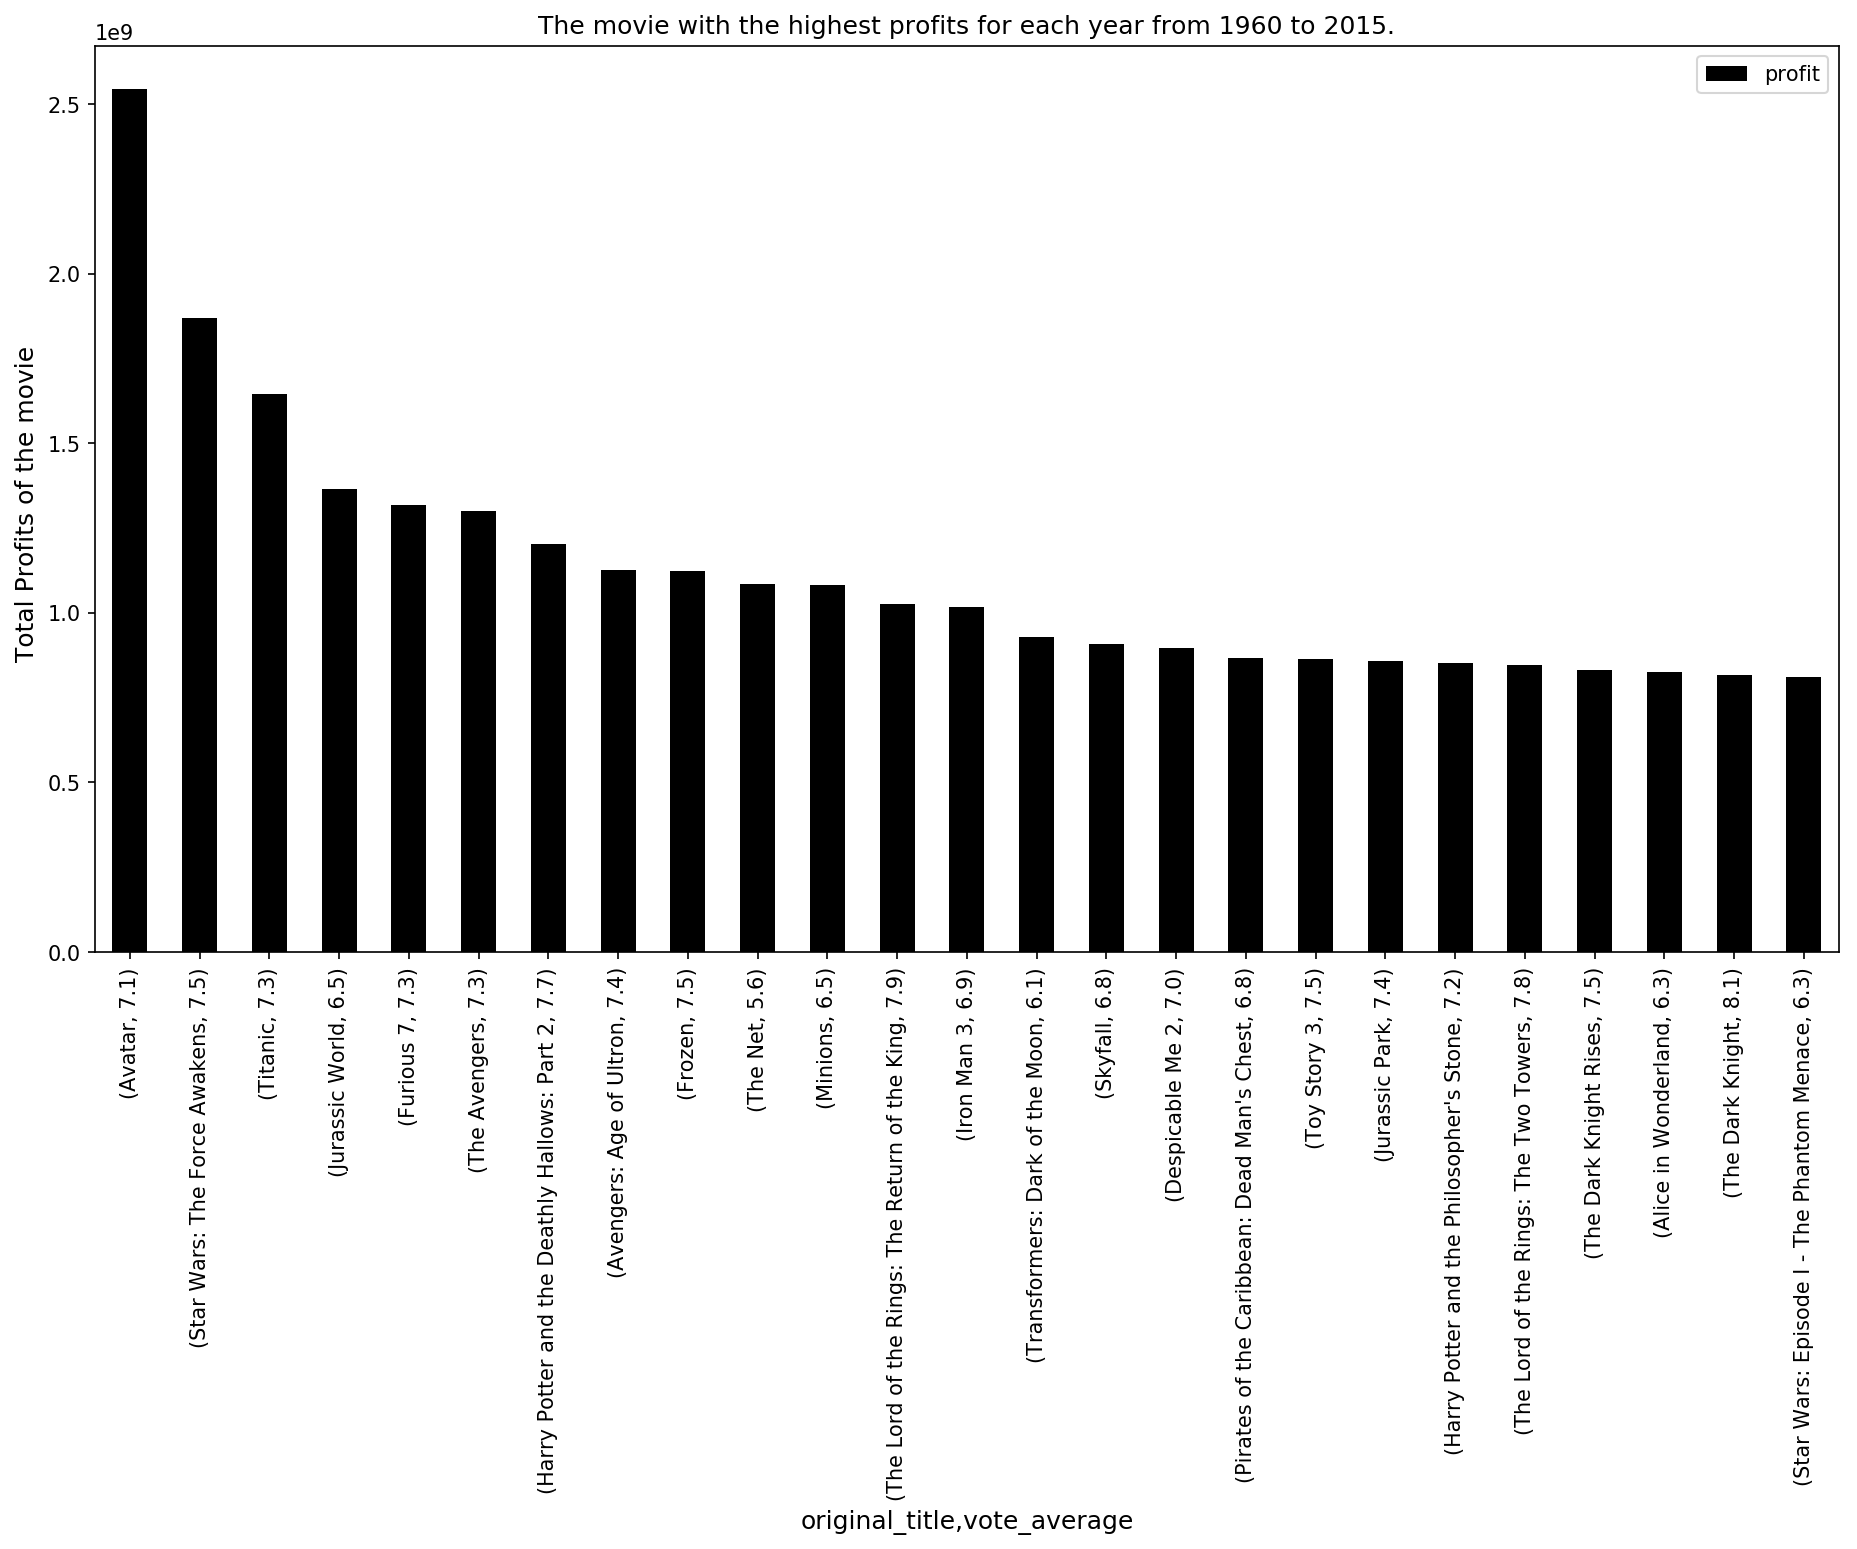

In [24]:
plt.figure(figsize=(15,8), dpi = 150)

# set the Y, x labels  
plt.ylabel('Total Profits of the movie ', fontsize = 12)
plt.xlabel('movie with rate ', fontsize = 12)
#set the titel of te figure 
plt.title('The movie with the highest profits for each year from 1960 to 2015.')
HP.plot(kind = 'bar',color= 'black').legend();

no, the avatar has the highest profit but not the better rating, in this list, the dark night has the better rating even it seems they equal in the vote count and the difference so big in rate.

<a id='Q4'></a>
<ul>
### Research Question 4: which director has the highest profit ? 
<ul>

In [25]:
#copy the data frame for avoiding any change in the main data frame 
Q4 = df.copy()
#insert the profit column to the copy DataFrame 
Q4.insert(2, 'profit', Q4['revenue'] - Q4['budget'])
#check it out
Q4.head()

,popularity,budget,profit,revenue,original_title,director,runtime,vote_count,vote_average,release_year
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015
2,13.112507,110000000,185238201,295238201,Insurgent,Robert Schwentke,119,2480,6.3,2015
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015
4,9.335014,190000000,1316249360,1506249360,Furious 7,James Wan,137,2947,7.3,2015


In [26]:
Q4.groupby('director')['profit'].sum().nlargest(25)

director
Steven Spielberg      7607123766
Peter Jackson         5374978943
James Cameron         5229582427
Michael Bay           3557208171
David Yates           3437773978
Chris Columbus        3279895086
Christopher Nolan     3279505208
Robert Zemeckis       2991724219
George Lucas          2955996893
J.J. Abrams           2839169916
Tim Burton            2758566327
Sam Raimi             2567113704
Roland Emmerich       2554558924
Joss Whedon           2482741497
Ron Howard            2477608615
Francis Lawrence      2476979588
Clint Eastwood        2402419791
Gore Verbinski        2355779679
Carlos Saldanha       2227930145
Ridley Scott          2225574833
Sam Mendes            2049548809
Woody Allen           1977956529
James Wan             1961395536
Steven Soderbergh     1816380007
M. Night Shyamalan    1785354930
Name: profit, dtype: int64

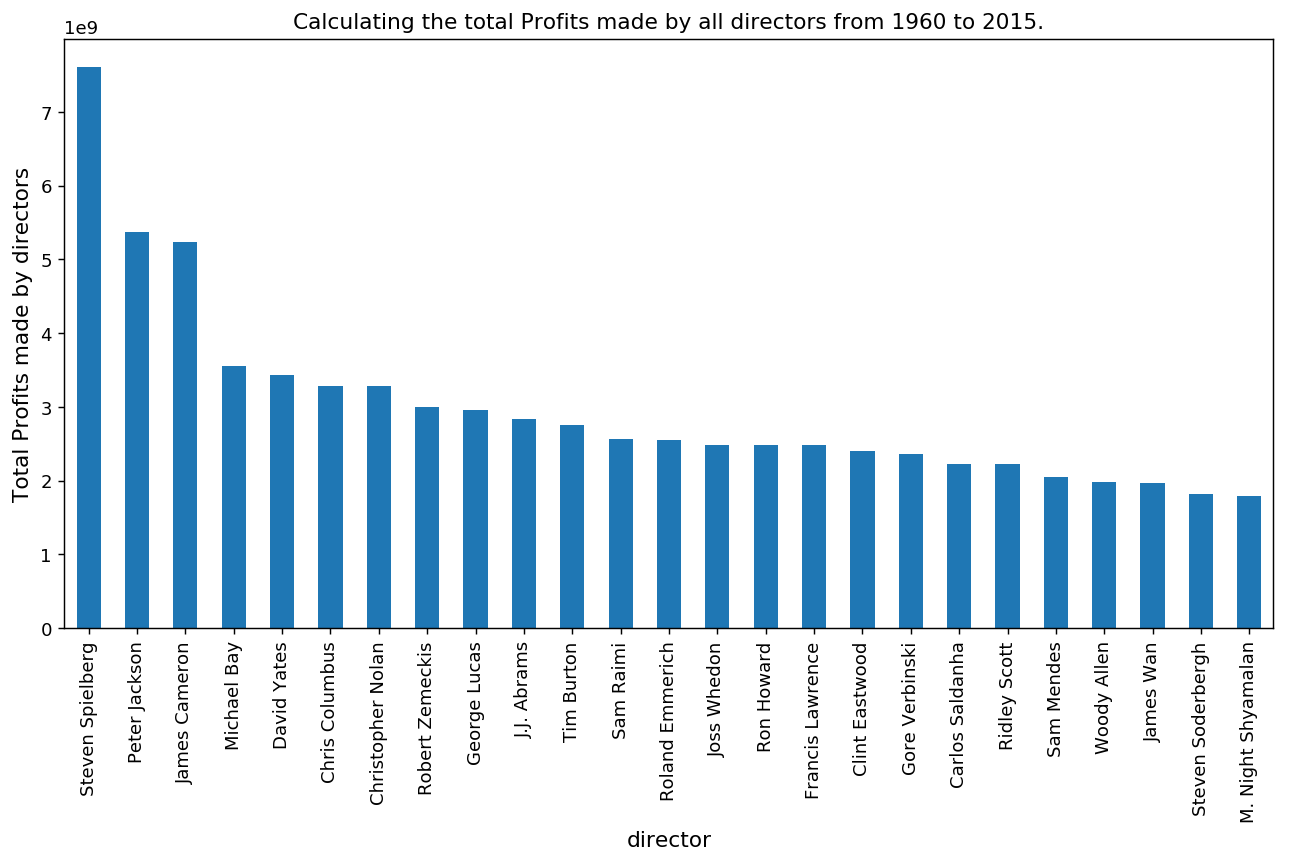

In [30]:
# set the figure size  
plt.figure(figsize=(12,6), dpi = 130)
#set the X label
plt.xlabel('director', fontsize = 12)
# set the Y label 
plt.ylabel('Total Profits made by directors', fontsize = 12)
#set the titel of te figure 
plt.title('Calculating the total Profits made by all directors from 1960 to 2015.')
# extract the top 10 directors has the highest profit by 'bar' chart 
Q4.groupby('director')['profit'].sum().nlargest(25).plot(kind = 'bar');

<ul>
<a id='conclusions'></a>
## Conclusions
<ul>

and an overall conclusion I would say that I'm very happy with these facts and know it, in the end we can say from the data w have, there is tow kind of successful movie one has the better rating and the other that has the highest profit, sure tow of them without a right director you will not meat one of them also you have to choose the right cast too.

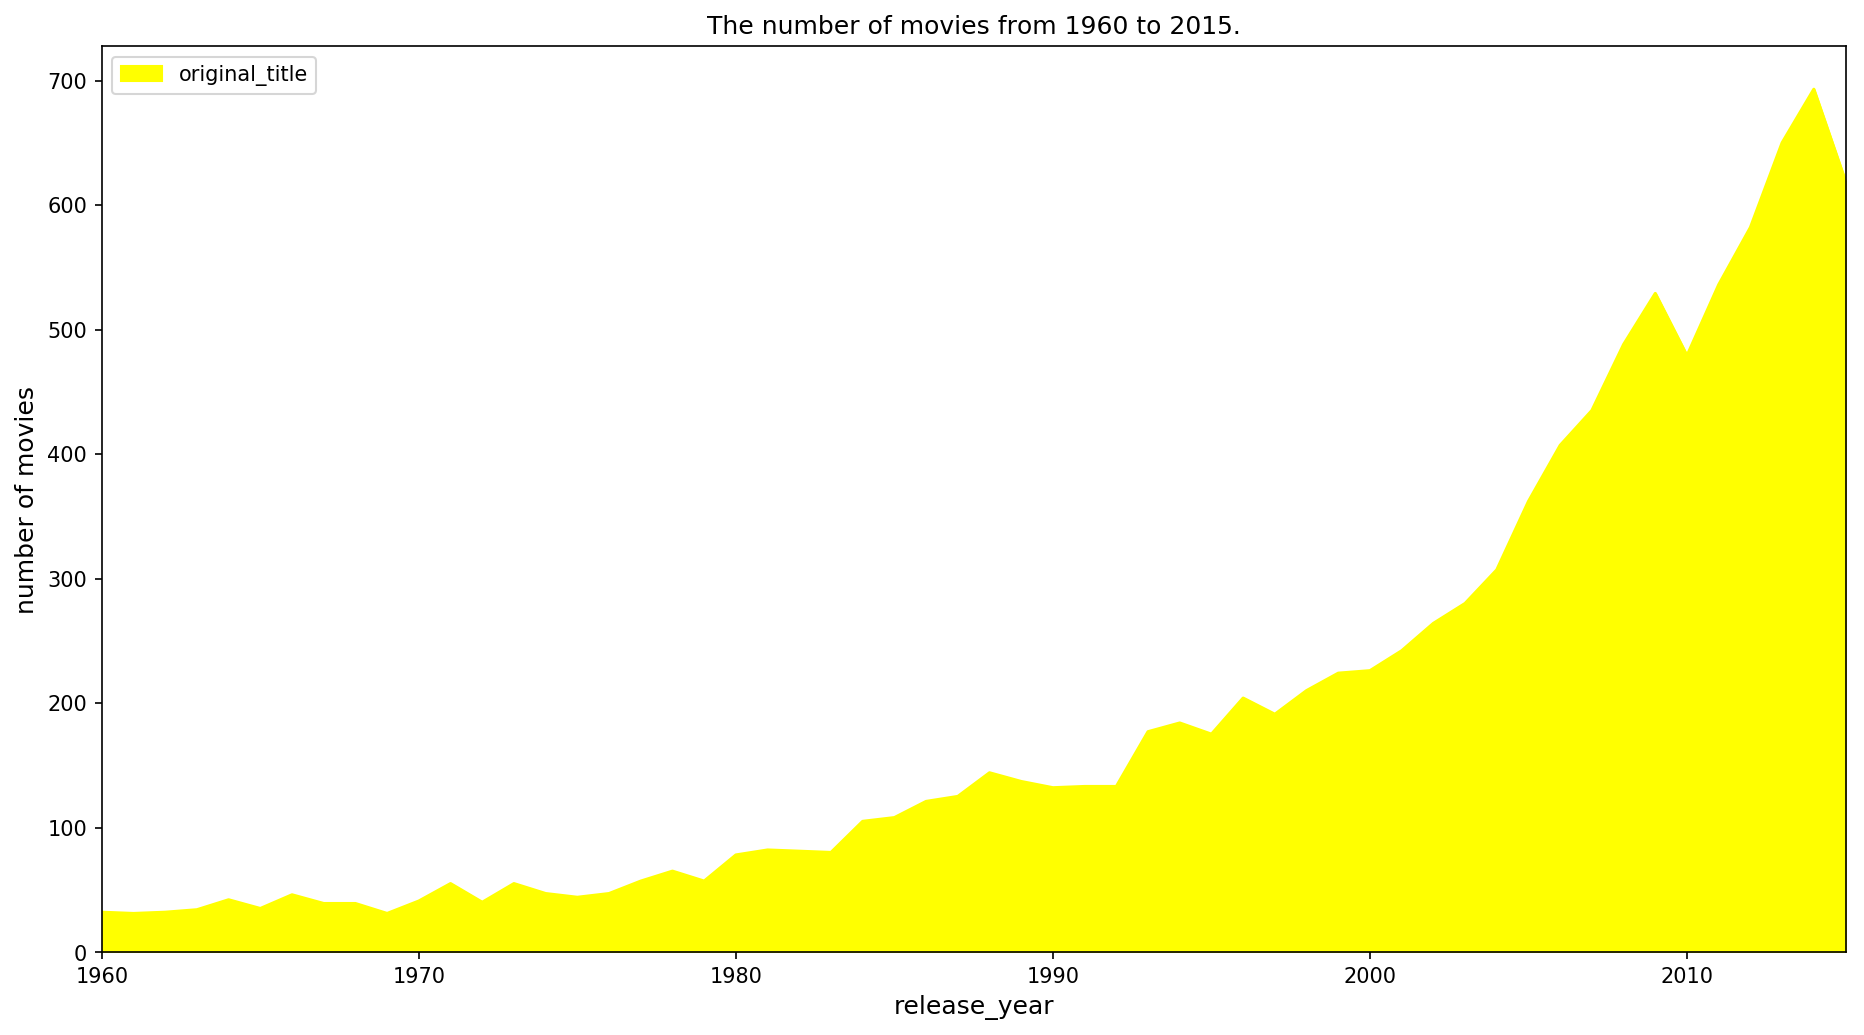

In [28]:

c = df.copy()
#calculate the profit for each year 
years = c.groupby('release_year')['original_title'].count()
#set the figure size 
plt.figure(figsize=(15,8), dpi = 150)
# set the Y, x labels  
plt.ylabel('number of movies', fontsize = 12)
plt.xlabel('the release year of the movies ', fontsize = 12)
#set the titel of te figure 
plt.title('The number of movies from 1960 to 2015.')
years.plot(kind=('area'),color= 'yellow' ).legend();

In [29]:
years

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     39
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    108
1986    121
1987    125
1988    144
1989    137
1990    132
1991    133
1992    133
1993    177
1994    184
1995    175
1996    204
1997    191
1998    210
1999    224
2000    226
2001    242
2002    264
2003    280
2004    307
2005    362
2006    407
2007    435
2008    488
2009    529
2010    479
2011    536
2012    582
2013    650
2014    693
2015    619
Name: original_title, dtype: int64

### Limitation: 
in this analysis, we used the profit to answer most of our questions and most of the revenue and the budget have 0s values, where it's what we depended on it, most of the data were missing or wrong like in a runtime. 

# Thank You,,,